In [ ]:
import numpy as np
import pandas as pd
import os
import zipfile
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from tqdm import tqdm
import plotly.express as px
import random
from PIL import Image
import plotly.graph_objects as go
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
with zipfile.ZipFile('/content/drive/MyDrive/test1.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/test1')
with zipfile.ZipFile('/content/drive/MyDrive/train.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/train')

In [ ]:
test_dir = ('/content/drive/MyDrive/test1')
train_dir = ('/content/drive/MyDrive/train/train')

In [ ]:
def load_images(folder, img_size=(64, 64), sample_count=20, label_filter=None):
    images = []
    labels = []
    filenames = os.listdir(folder)

    if label_filter is not None:
        filenames = [fname for fname in filenames if label_filter in fname]

    random.shuffle(filenames)
    for img in filenames[:sample_count]:
        try:
            img_path = os.path.join(folder, img)
            img_pil = Image.open(img_path)
            img_pil = img_pil.resize(img_size)
            img_np = np.array(img_pil) / 255.0  # Normalize pixel valuesimages.append(img_np)
            images.append(img_np)
            labels.append(0 if 'cat' in img else 1)
        except Exception as e:
            print(f"Error loading image {img}: {e}")

    return np.array(images), np.array(labels)

In [ ]:
def visualize_images(images, labels, sample_count=20):
    fig, axes = plt.subplots(4, 5, figsize=(15, 12))
    axes = axes.flatten()

    for i in range(sample_count):
        axes[i].imshow(images[i])
        axes[i].set_title('Cat' if labels[i] == 0 else 'Dog')
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

In [ ]:
# Load images with label 'cat'
cat_images, cat_labels = load_images(train_dir, sample_count=20)

# Check if any images were loaded
if len(cat_images) == 0:
    print(f"No images found with label 'cat' in directory '{train_dir}'")
else:
    # Visualize only the number of images that were actually loaded
    visualize_images(cat_images, cat_labels, sample_count=min(20, len(cat_images)))


In [ ]:
dog_images, dog_labels = load_images(train_dir, sample_count=20, label_filter='dog')
visualize_images(dog_images, dog_labels, sample_count=20)

In [ ]:
all_images, all_labels = load_images(train_dir, sample_count=20)
visualize_images(all_images, all_labels, sample_count=20)

In [ ]:
images, labels = load_images(train_dir, sample_count=10000)
images = images / 255.0

In [ ]:
print("Shape of images array:", images.shape)

In [ ]:
print("Shape of the first image:", images[0].shape)

In [ ]:
print(images[:2])
print(labels[:2])

In [ ]:
n_samples, img_height, img_width, img_channels = images.shape
images_flat = images.reshape(n_samples, -1)

In [ ]:
scaler = StandardScaler()
images_flat_scaled = scaler.fit_transform(images_flat)

In [ ]:
perplexity = min(30, n_samples - 1)
tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
images_tsne = tsne.fit_transform(images_flat_scaled)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(images_flat_scaled, labels, test_size=0.2, random_state=42)

In [ ]:
X_train

In [ ]:
X_val

In [ ]:
X_val

In [ ]:
y_val

In [ ]:
unique, counts = np.unique(labels, return_counts=True)
print(f"Class distribution: {dict(zip(unique, counts))}")

In [ ]:
def plot_tsne_data(tsne_data, labels, title):
    df_tsne = pd.DataFrame()
    df_tsne['X'] = tsne_data[:, 0]
    df_tsne['Y'] = tsne_data[:, 1]
    df_tsne['Label'] = labels
    df_tsne['Label'] = df_tsne['Label'].map({0: 'Cat', 1: 'Dog'})

    fig = px.scatter(df_tsne, x='X', y='Y', color='Label', title=title)
    fig.show()

plot_tsne_data(images_tsne, labels, 't-SNE visualization of Cats vs Dogs')

In [ ]:
#svm = SVC(kernel='linear')
#svm.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
#y_val_pred = svm.predict(X_val)

In [ ]:
#y_val_pred

array([1, 0, 1, ..., 1, 0, 0])

In [ ]:
#val_accuracy = accuracy_score(y_val, y_val_pred)
#val_class_report = classification_report(y_val, y_val_pred, target_names=['Cat', 'Dog'])
#val_conf_matrix = confusion_matrix(y_val, y_val_pred)

In [ ]:
#print(f'Validation Accuracy: {val_accuracy:.4f}')

Validation Accuracy: 0.5505


In [ ]:
#print('Validation Classification Report:')
#print(val_class_report)

Validation Classification Report:
              precision    recall  f1-score   support

         Cat       0.54      0.56      0.55       984
         Dog       0.56      0.54      0.55      1016

    accuracy                           0.55      2000
   macro avg       0.55      0.55      0.55      2000
weighted avg       0.55      0.55      0.55      2000



Validation Confusion Matrix:
[[553 431]
 [468 548]]


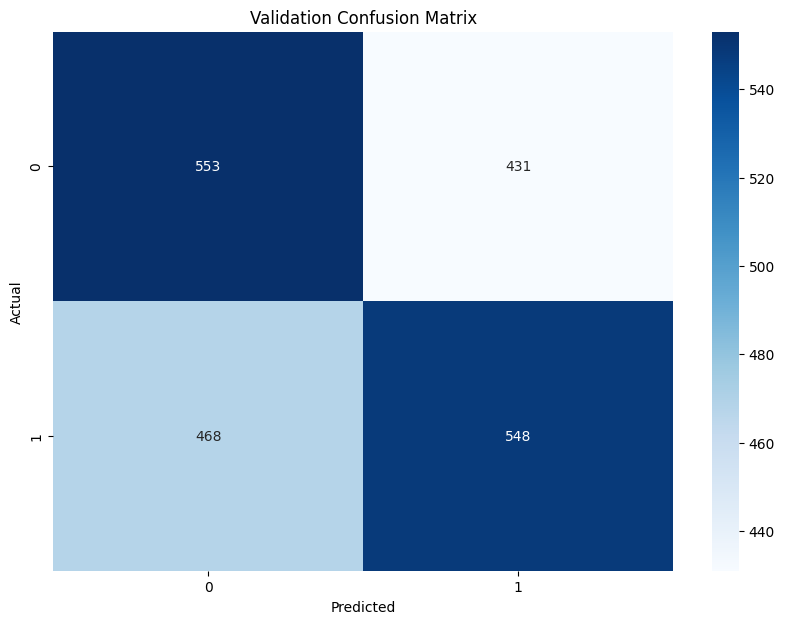

In [ ]:
#import seaborn as sns
#from sklearn.metrics import confusion_matrix
#print('Validation Confusion Matrix:')
#print(val_conf_matrix)
#plt.figure(figsize=(10, 7))
#sns.heatmap(val_conf_matrix, annot=True, fmt='d', cmap='Blues')
#plt.ylabel('Actual')
#plt.xlabel('Predicted')
#plt.title('Validation Confusion Matrix')
#plt.show()

In [ ]:
import pickle
import os

# Create the directory if it doesn't exist
os.makedirs('/kaggle/working/', exist_ok=True)

# Assuming 'svm' is your trained SVM model
with open('/kaggle/working/svm_model.pkl', 'wb') as f:
    pickle.dump(svm, f)  # Make sure 'svm' is defined

with open('/kaggle/working/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [ ]:
# Correct the path to point to the directory containing images
test_images, test_labels = load_images(os.path.join(test_dir, 'test1'))
test_images = test_images / 255.0

In [ ]:
# Check if test_images is empty and handle it accordingly
if test_images.size == 0:
    print("Error: 'test_images' is empty. Please check the loading process.")
else:
    n_test_samples, test_img_height, test_img_width, test_img_channels = test_images.shape
    test_images_flat = test_images.reshape(n_test_samples, -1)
    test_images_flat_scaled = scaler.transform(test_images_flat)

In [ ]:
test_images_flat_scaled = scaler.transform(test_images_flat)

In [ ]:
# Determine a new perplexity value for the test data
test_perplexity = min(30, n_test_samples - 1)

# Create a new t-SNE instance for the test data
test_tsne = TSNE(n_components=2, perplexity=test_perplexity, random_state=42)
test_images_tsne = test_tsne.fit_transform(test_images_flat_scaled)

In [ ]:
y_test_pred = svm.predict(test_images_flat_scaled)
y_test_pred

array([1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1])

In [ ]:
df_test_tsne = pd.DataFrame()
df_test_tsne['X'] = test_images_tsne[:, 0]
df_test_tsne['Y'] = test_images_tsne[:, 1]
df_test_tsne['Predicted Label'] = y_test_pred
df_test_tsne['Predicted Label'] = df_test_tsne['Predicted Label'].map({0: 'Cat', 1: 'Dog'})

In [ ]:
fig = px.scatter(df_test_tsne, x='X', y='Y', color='Predicted Label', title='t-SNE visualization of Test Data Predictions')
fig.show()

In [ ]:
def plot_test_samples(images, tsne_data, predictions, sample_count=10):
    sample_indices = np.random.choice(range(len(images)), sample_count, replace=False)
    sample_images = images[sample_indices]
    tsne_samples = tsne_data[sample_indices]
    pred_samples = predictions[sample_indices]

    fig = px.scatter(tsne_samples, x=tsne_samples[:, 0], y=tsne_samples[:, 1], color=pred_samples.astype(str),
                     title="Test Data Predictions (t-SNE Space)")
    fig.show()

plot_test_samples(test_images, test_images_tsne, y_test_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



99.61%


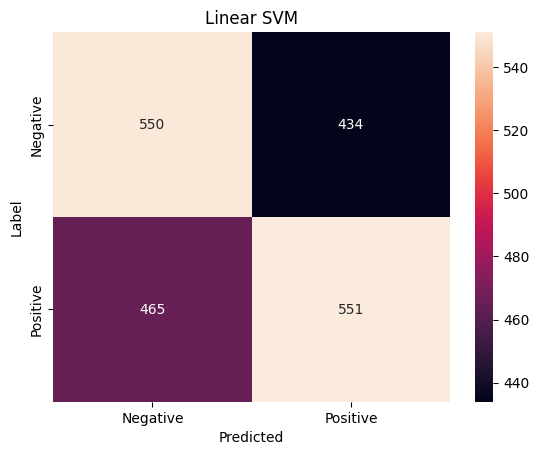

              precision    recall  f1-score   support

           0       0.54      0.56      0.55       984
           1       0.56      0.54      0.55      1016

    accuracy                           0.55      2000
   macro avg       0.55      0.55      0.55      2000
weighted avg       0.55      0.55      0.55      2000



In [ ]:
from sklearn.svm import SVC, LinearSVC
clf = LinearSVC()
clf.fit(X_train, y_train)
y_pred_linear_svc = clf.predict(X_val)
acc_linear_svc = round(clf.score(X_train, y_train) * 100, 2)
print (str(acc_linear_svc) + '%')
confusion = confusion_matrix(y_val, y_pred_linear_svc)
sns.heatmap(confusion, fmt='g',annot=True , xticklabels=['Negative' , 'Positive'] , yticklabels=['Negative' , 'Positive'])
plt.title("Linear SVM")
plt.ylabel("Label")
plt.xlabel("Predicted")
plt.show()
from sklearn.metrics import classification_report
print(classification_report(y_val,y_pred_linear_svc))
#spe_linear_svc=99.94
#sen_linear_svc=8.4

86.25%


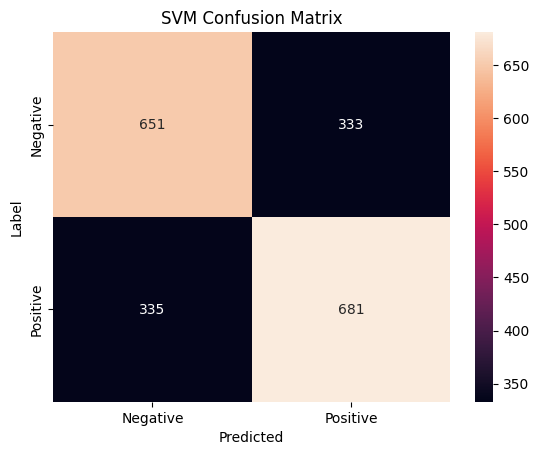

              precision    recall  f1-score   support

           0       0.66      0.66      0.66       984
           1       0.67      0.67      0.67      1016

    accuracy                           0.67      2000
   macro avg       0.67      0.67      0.67      2000
weighted avg       0.67      0.67      0.67      2000



In [ ]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, y_train)
y_pred_svc = clf.predict(X_val)
acc_svc = round(clf.score(X_train, y_train) * 100, 2)
print (str(acc_svc) + '%')
confusion = confusion_matrix(y_val, y_pred_svc)
sns.heatmap(confusion, fmt='g',annot=True , xticklabels=['Negative' , 'Positive'] , yticklabels=['Negative' , 'Positive'])
plt.title("SVM Confusion Matrix")
plt.ylabel("Label")
plt.xlabel("Predicted")
plt.show()
from sklearn.metrics import classification_report
print(classification_report(y_val,y_pred_svc))